Decision Tree

Tiatnic Survival Dataset

In [44]:
#Import the Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
#Load the data sets- train and test 
df = pd.read_csv("train.csv")

In [46]:
#Look at top values of train data 

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
#Print the column names of train data
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [48]:
#Print the dimension of train and test data
print("Dimension  : ",df.shape)

Dimension  :  (891, 12)


In [49]:
#Print the number of missing values in each column of train and test data

# Print missing values in training data
print("Missing values in  data:")
print(df.isnull().sum())




Missing values in  data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Visualization

    countplot() → Directly counts occurrences of categories (X: category, Y: count).
    barplot() → Requires manual aggregation (X: category, Y: any numerical value like count, mean, sum, etc.).

Use countplot() for quick counts, barplot() for more control.

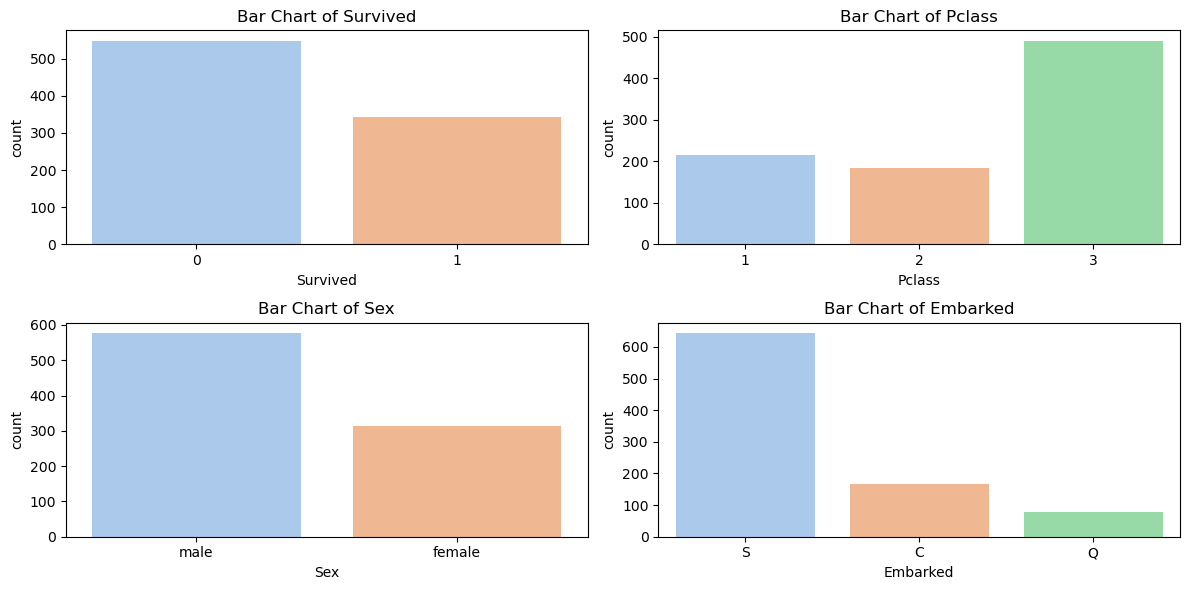

In [50]:
#Barchart of Survived, Pclass, Sex, Embarked


#using barchart

# Define categorical variables
categorical_cols = ["Survived", "Pclass", "Sex", "Embarked"]

# Check if columns exist in the dataset
existing_cols = [col for col in categorical_cols if col in df.columns]


# Create bar plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(existing_cols, 1):
    plt.subplot(2, 2, i)
    
    # Get counts of each category
    category_counts = df[col].value_counts().reset_index()
    category_counts.columns = [col, "count"]
    
    # Bar plot
    sns.barplot(x=col, y="count", data=category_counts, palette="pastel")
    plt.title(f"Bar Chart of {col}")

plt.tight_layout()
plt.show()


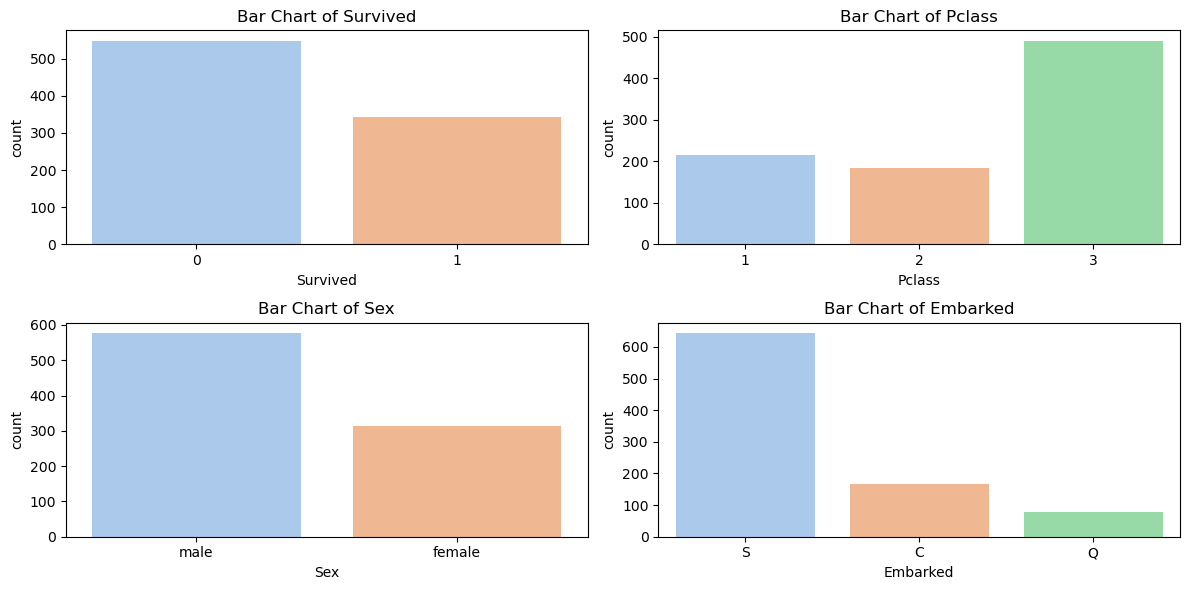

In [51]:
#Barchart of Survived, Pclass, Sex, Embarked


#using countchart

# Check if the required columns exist
categorical_cols = ["Survived", "Pclass", "Sex", "Embarked"]
existing_cols = [col for col in categorical_cols if col in df.columns]

# Plot bar charts for existing columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(existing_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f"Bar Chart of {col}")

plt.tight_layout()
plt.show()

/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


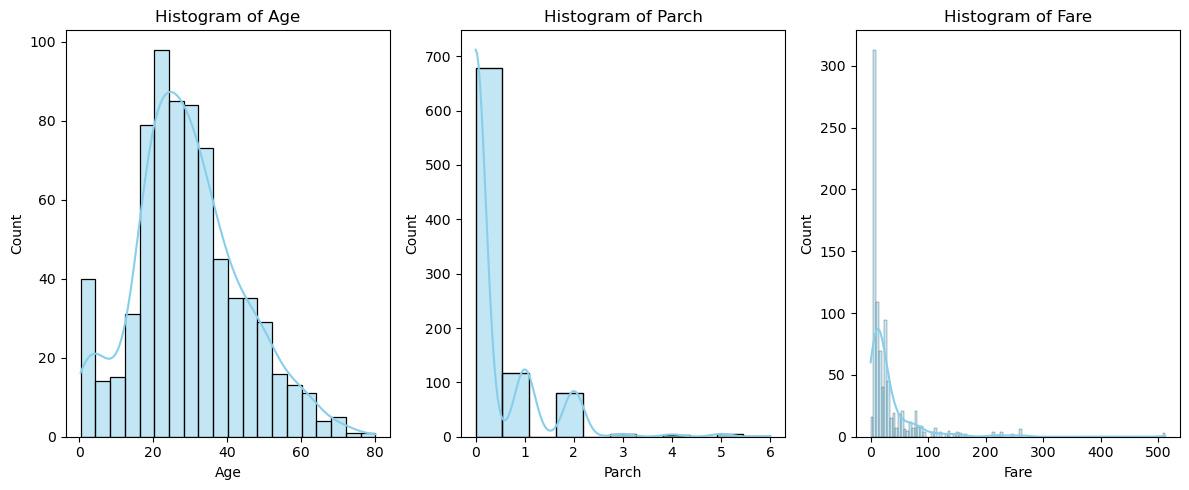

In [52]:
#Histogram of Age, Parch, Fare

# Define numerical columns
numerical_cols = ["Age", "Parch", "Fare"]

# Check if columns exist in the dataset
existing_cols = [col for col in numerical_cols if col in df.columns]

# Plot histograms
plt.figure(figsize=(12, 5))
for i, col in enumerate(existing_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


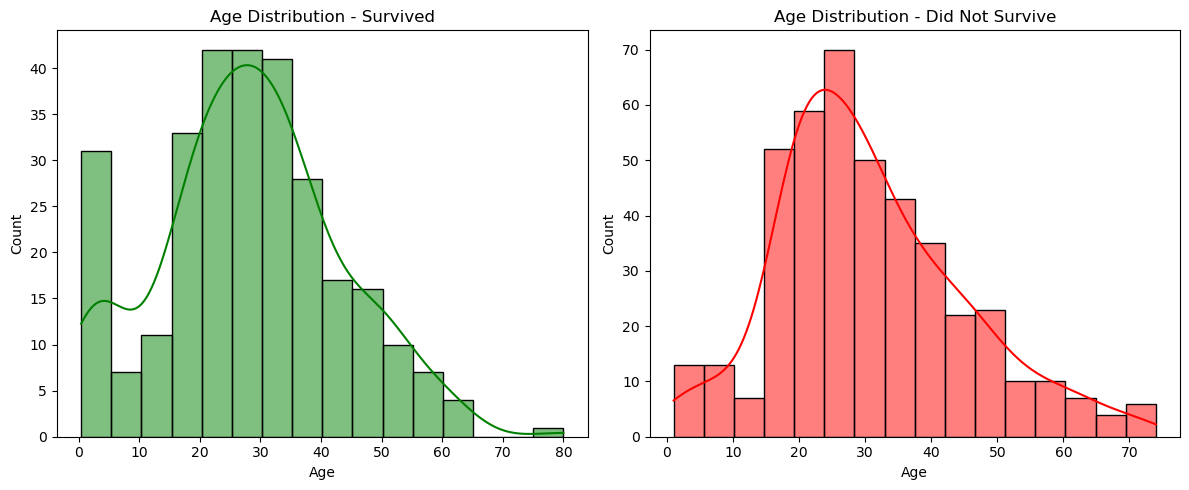

In [53]:
#Plot histogram of age for survived and did not survived class


# Check if "Survived" and "Age" exist in the dataset
if "Survived" in df.columns and "Age" in df.columns:
    plt.figure(figsize=(12, 5))

    # Survived
    plt.subplot(1, 2, 1)
    sns.histplot(df[df["Survived"] == 1]["Age"], kde=True, color="green")
    plt.title("Age Distribution - Survived")
    plt.xlabel("Age")
    plt.ylabel("Count")

    # Did Not Survive
    plt.subplot(1, 2, 2)
    sns.histplot(df[df["Survived"] == 0]["Age"], kde=True, color="red")
    plt.title("Age Distribution - Did Not Survive")
    plt.xlabel("Age")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()
else:
    print("Columns 'Survived' and 'Age' not found in the dataset.")


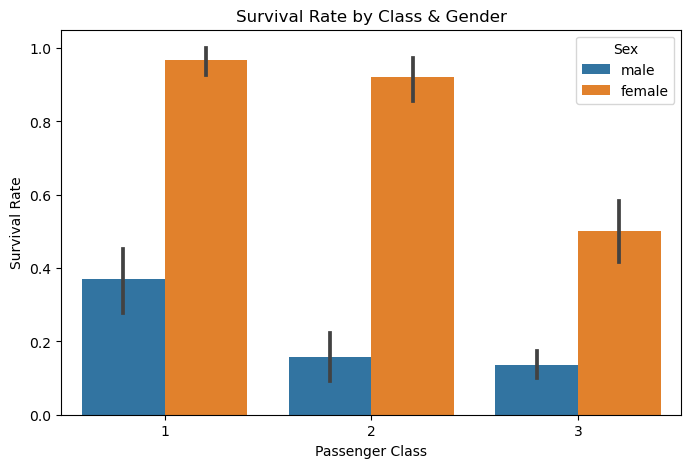

In [54]:
#Count class and geder wise survival rate - plot with appropriate chart


# Why Bar Plot? → It shows survival rates per class segmented by gender.


# Countplot of Survival Rate by Class & Gender
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)

plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Class & Gender")
plt.show()

/tmp/ipykernel_4351/364887686.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Sex"] == "male"]["Age"], label="Male", shade=True, color="blue")
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_4351/364887686.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Sex"] == "female"]["Age"], label="Female", shade=True, color="red")
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. C

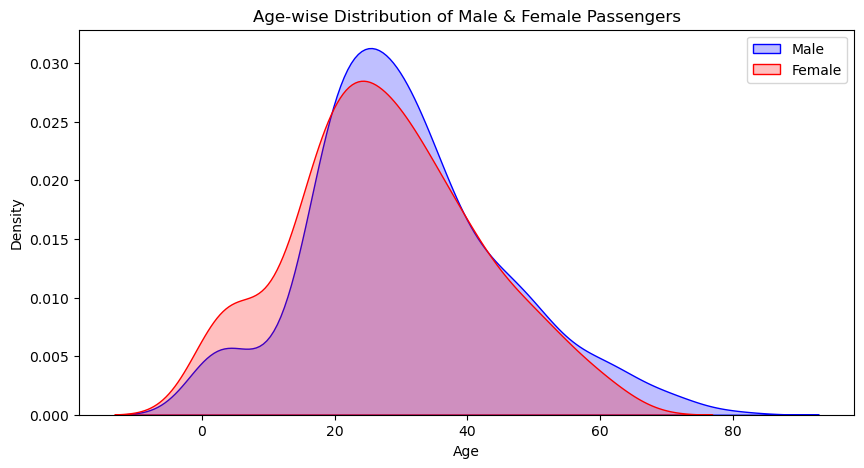

In [55]:
#Age wise Distribution of Male and Female passengers



# Why KDE Plot? → It gives a smooth age distribution curve, making gender-wise differences clear.

plt.figure(figsize=(10, 5))
sns.kdeplot(df[df["Sex"] == "male"]["Age"], label="Male", shade=True, color="blue")
sns.kdeplot(df[df["Sex"] == "female"]["Age"], label="Female", shade=True, color="red")

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age-wise Distribution of Male & Female Passengers")
plt.legend()
plt.show()


/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


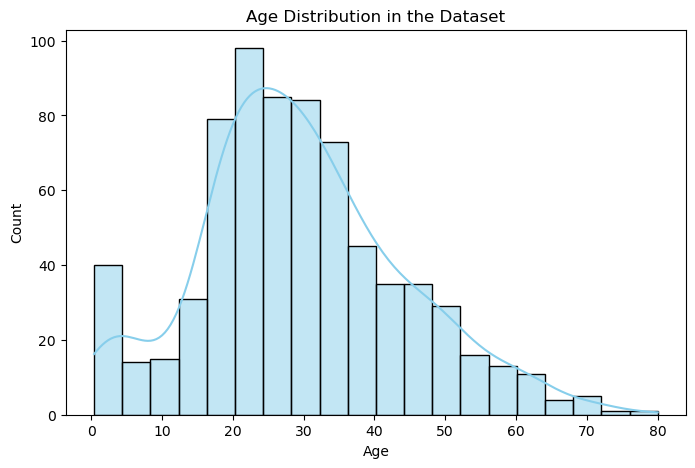

In [56]:
#Histogram of Age of the given data set(sample)

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], kde=True, color="skyblue")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in the Dataset")
plt.show()


## Handling Missing Values

In [57]:
#Replace the missing values in Embarked column by 'S'
df["Embarked"].fillna("S", inplace=True)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [58]:
#Impute the missing values in Fare column with median value
df["Fare"].fillna(df["Fare"].median(), inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

mean_age = df["Age"].mean()  # Computes the mean of known Age values
std_age = df["Age"].std()    # Computes the standard deviation of known Age values
print(mean_age)
print(std_age)


def fill_missing_age(x):
    if pd.isnull(x):
        return np.random.normal(mean_age, std_age)
    else:
        return x

df["Age"] = df["Age"].apply(fill_missing_age)
mean_age = df["Age"].mean()  # Computes the mean of known Age values
std_age = df["Age"].std()    # Computes the standard deviation of known Age values
print(mean_age)
print(std_age)
print("\nNull values after filling \n" ,df.isnull().sum())

29.69911764705882
14.526497332334044
29.605583086530245
14.653146313373956

Null values after filling 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


## Feature Engineering - Creating new features

In [60]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.869583,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


In [61]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.869583,1,2,W./C. 6607,23.4500,NaN,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,1


In [62]:
## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True

df["Has_cabin"] = (df["Cabin"].notna()).astype(int)
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  IsAlone  \
0      0         A/5 21171   7.2500   NaN        S           2        0   
1      0          PC 17599  71.2833   C85        C           2        0   
2      0  STON/O2. 3101282   7.9250   NaN        S           1        1   
3      0            

In [63]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin

df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
print(df.head())



   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0         0       3    male  22.0      1      0   7.2500        S           2   
1         1       1  female  38.0      1      0  71.2833        C           2   
2         1       3  female  26.0      0      0   7.9250        S           1   
3         1       1  female  35.0      1      0  53.1000        S           2   
4         0       3    male  35.0      0      0   8.0500        S           1   

   IsAlone  Has_cabin  
0        0          0  
1        0          1  
2        1          0  
3        0          1  
4        1          0  


## Model Building

In [64]:
#Prepare X and y


print(df.columns)
x = df.drop(columns=["Survived"])
y = df["Survived"]



Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Has_cabin'],
      dtype='object')


In [65]:
# Label encoding of categorical features


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

x["Sex"] = label_encoder.fit_transform(x["Sex"])
x["Embarked"] = label_encoder.fit_transform(x["Embarked"])

print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  FamilySize  \
0         3    1  22.000000      1      0   7.2500         2           2   
1         1    0  38.000000      1      0  71.2833         0           2   
2         3    0  26.000000      0      0   7.9250         2           1   
3         1    0  35.000000      1      0  53.1000         2           2   
4         3    1  35.000000      0      0   8.0500         2           1   
..      ...  ...        ...    ...    ...      ...       ...         ...   
886       2    1  27.000000      0      0  13.0000         2           1   
887       1    0  19.000000      0      0  30.0000         2           1   
888       3    0  21.869583      1      2  23.4500         2           4   
889       1    1  26.000000      0      0  30.0000         0           1   
890       3    1  32.000000      0      0   7.7500         1           1   

     IsAlone  Has_cabin  
0          0          0  
1          0          1  
2        

In [66]:
# concat df_categorical with original df

/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

<Figure size 2000x2000 with 0 Axes>

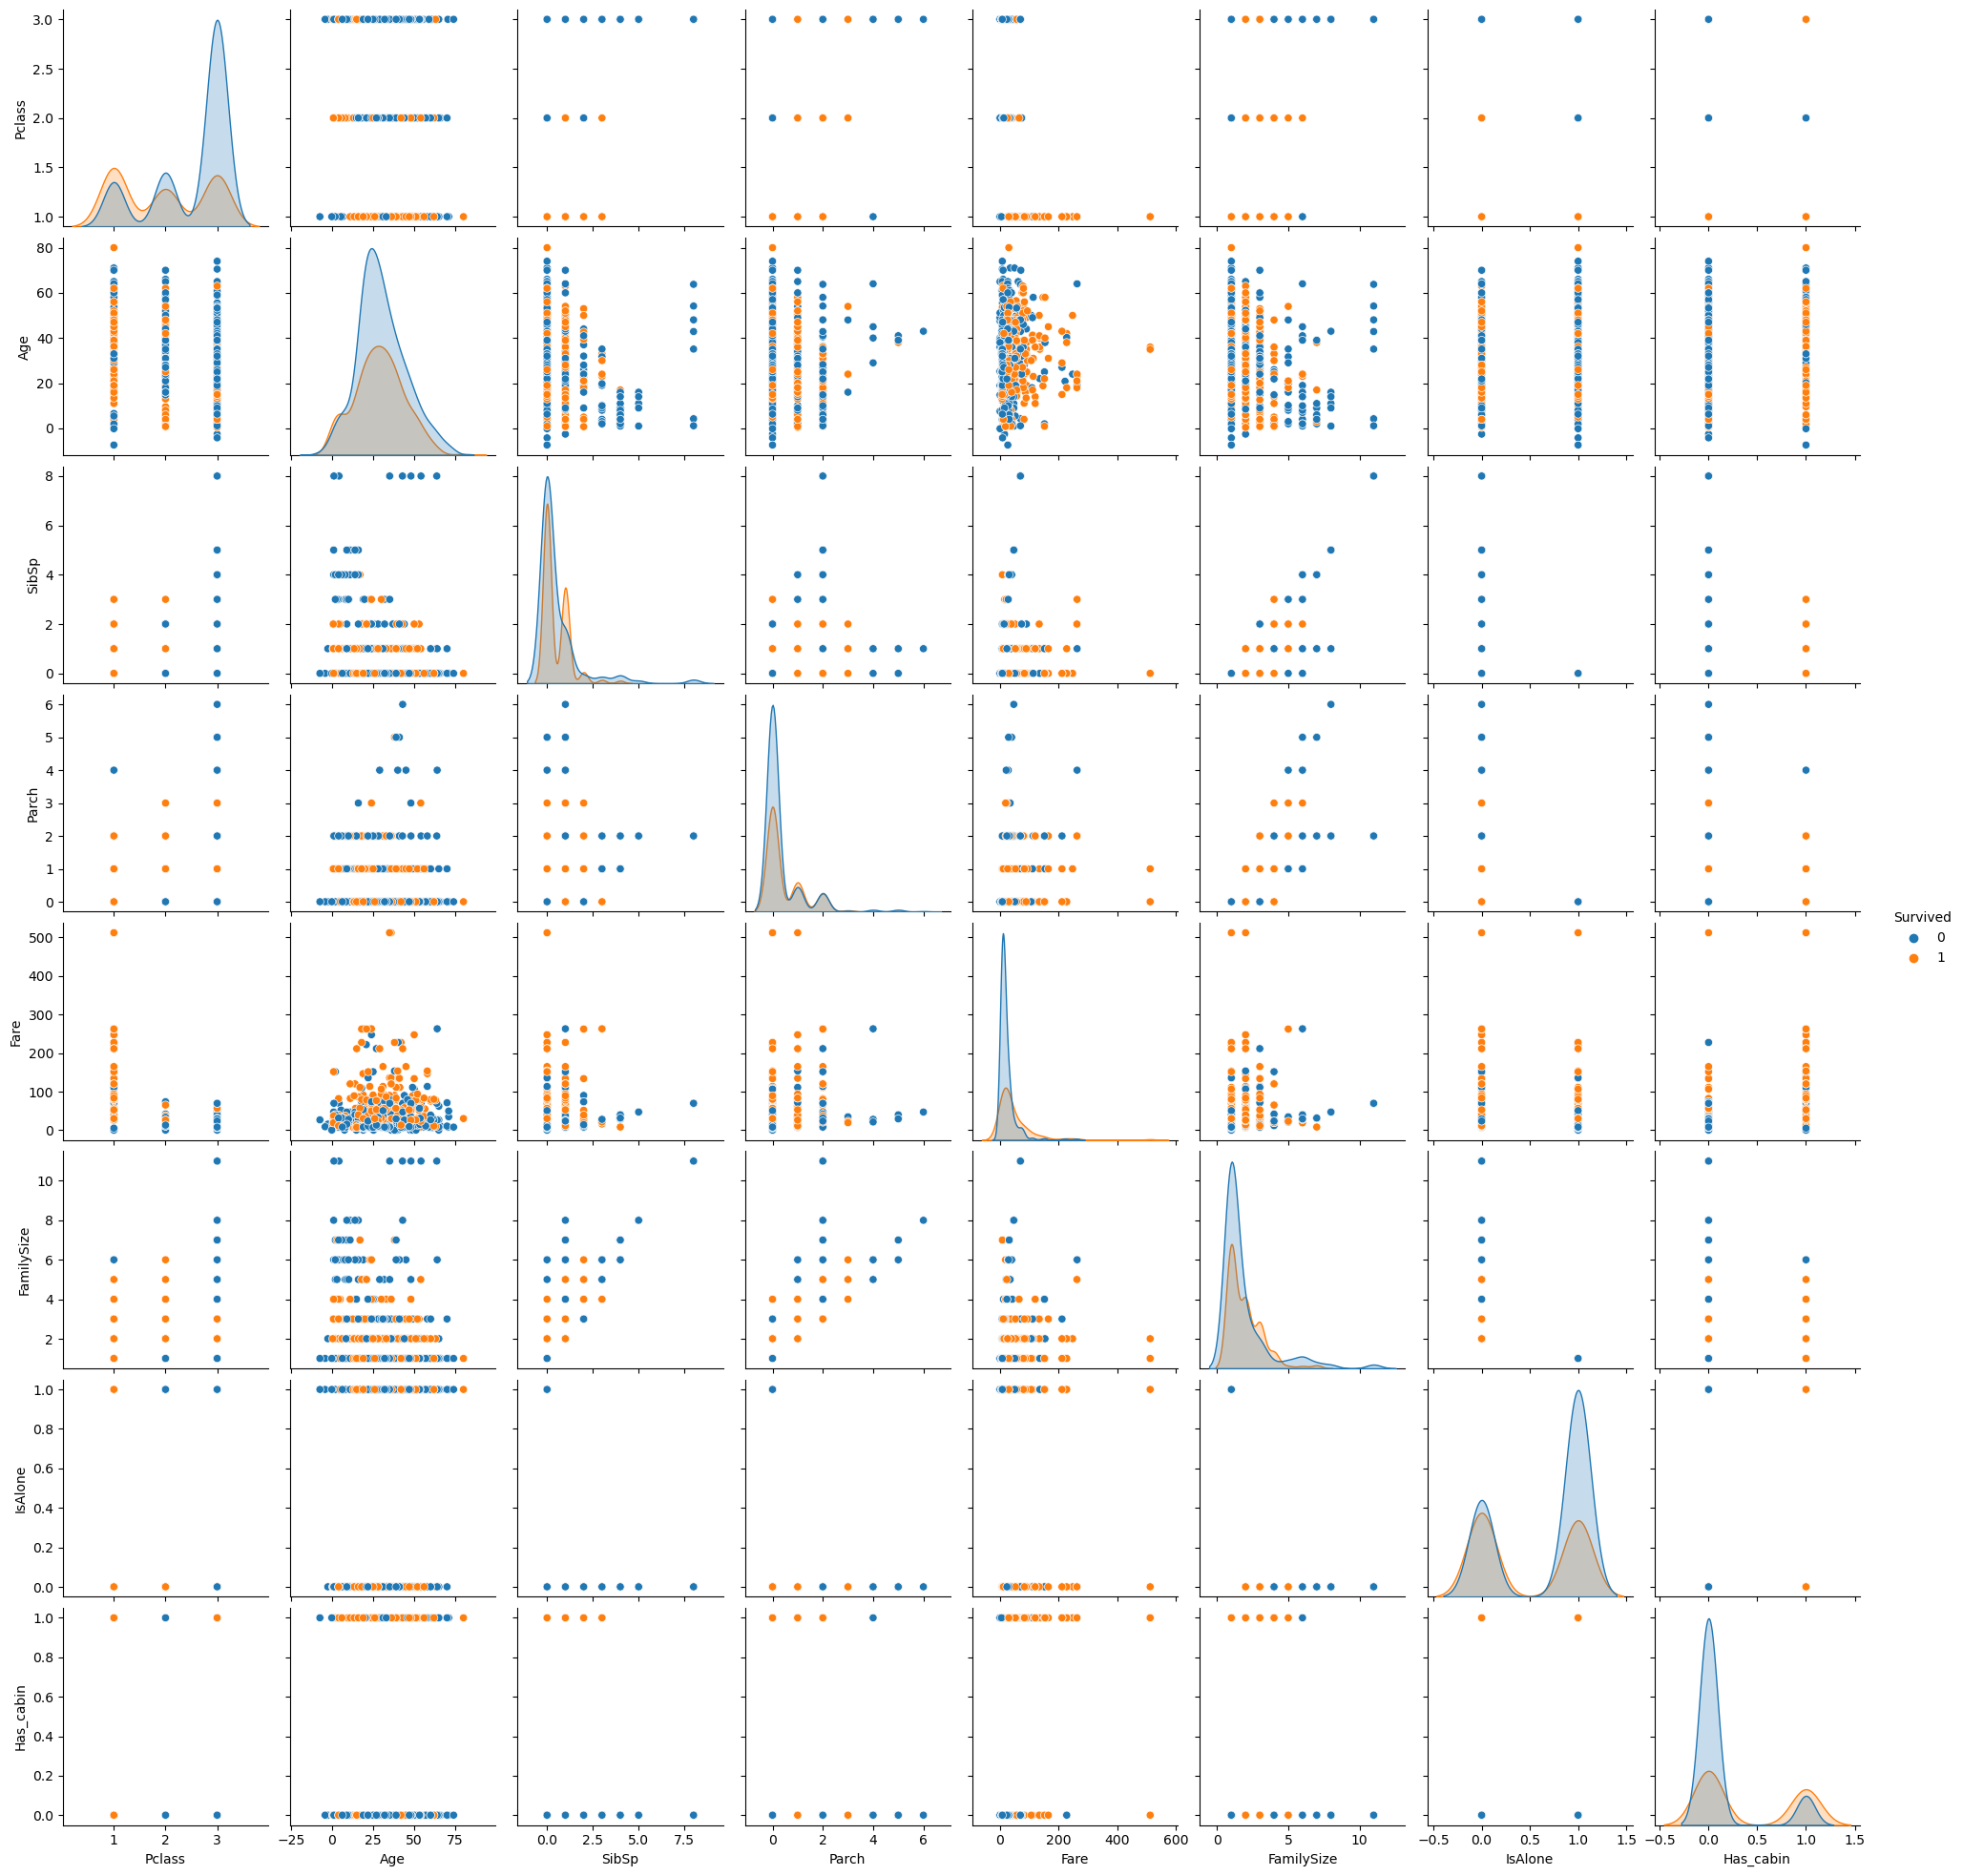

In [67]:
#Do a pairplot of all features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

sns.pairplot(df,hue="Survived")
plt.show()



In [68]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_validation = train_test_split(x,y, test_size=0.1 ,random_state=42, stratify=y)


In [69]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train,y_train)

DecisionTreeClassifier()

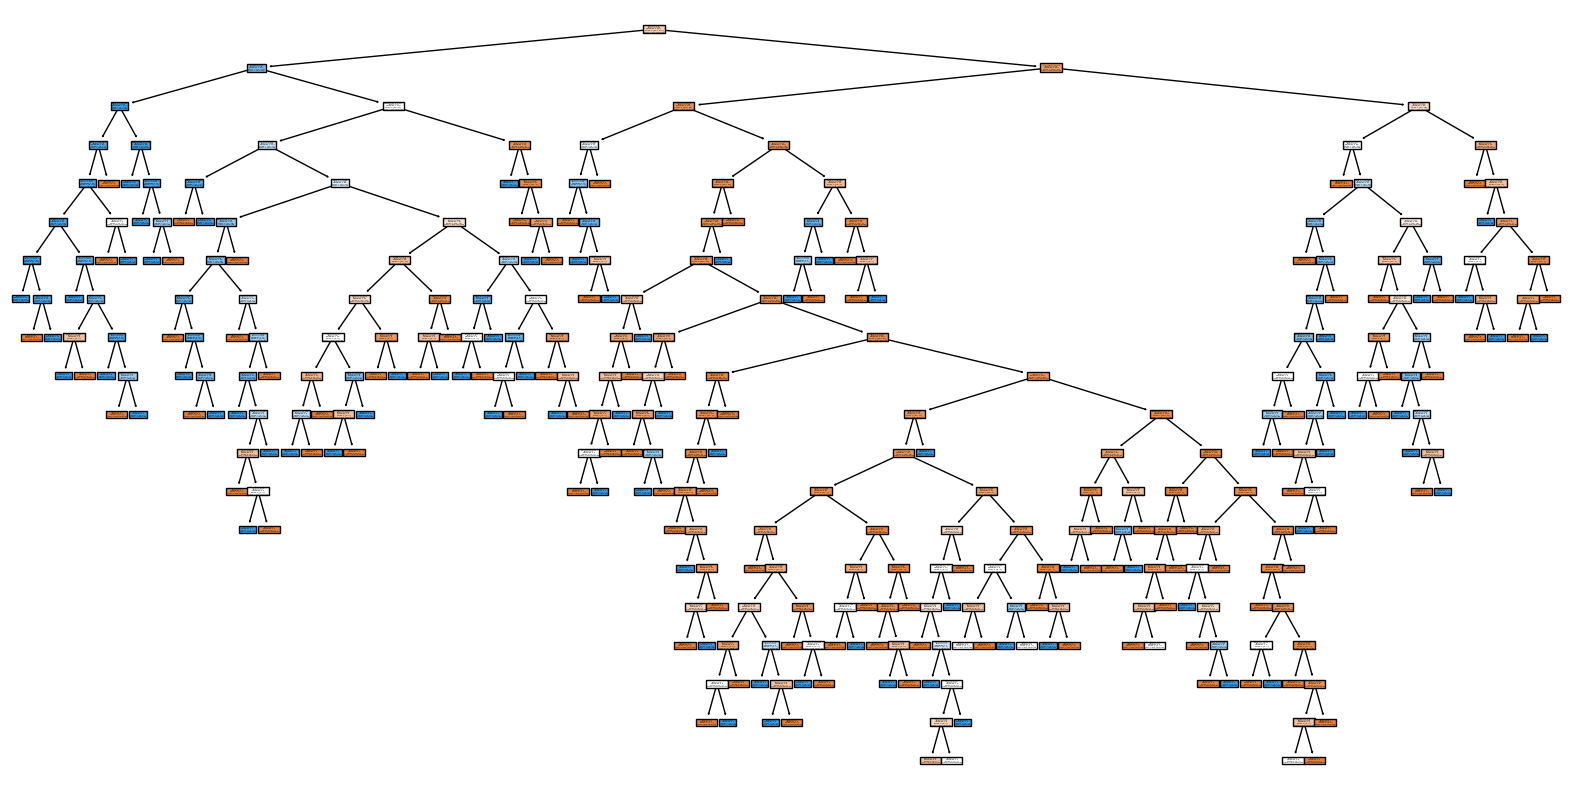

In [70]:
#Print the tree

# Importing required packages for visualization

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10)) 
plot_tree(model, filled=True, feature_names=x.columns, class_names=["Not Survived", "Survived"])
plt.show()




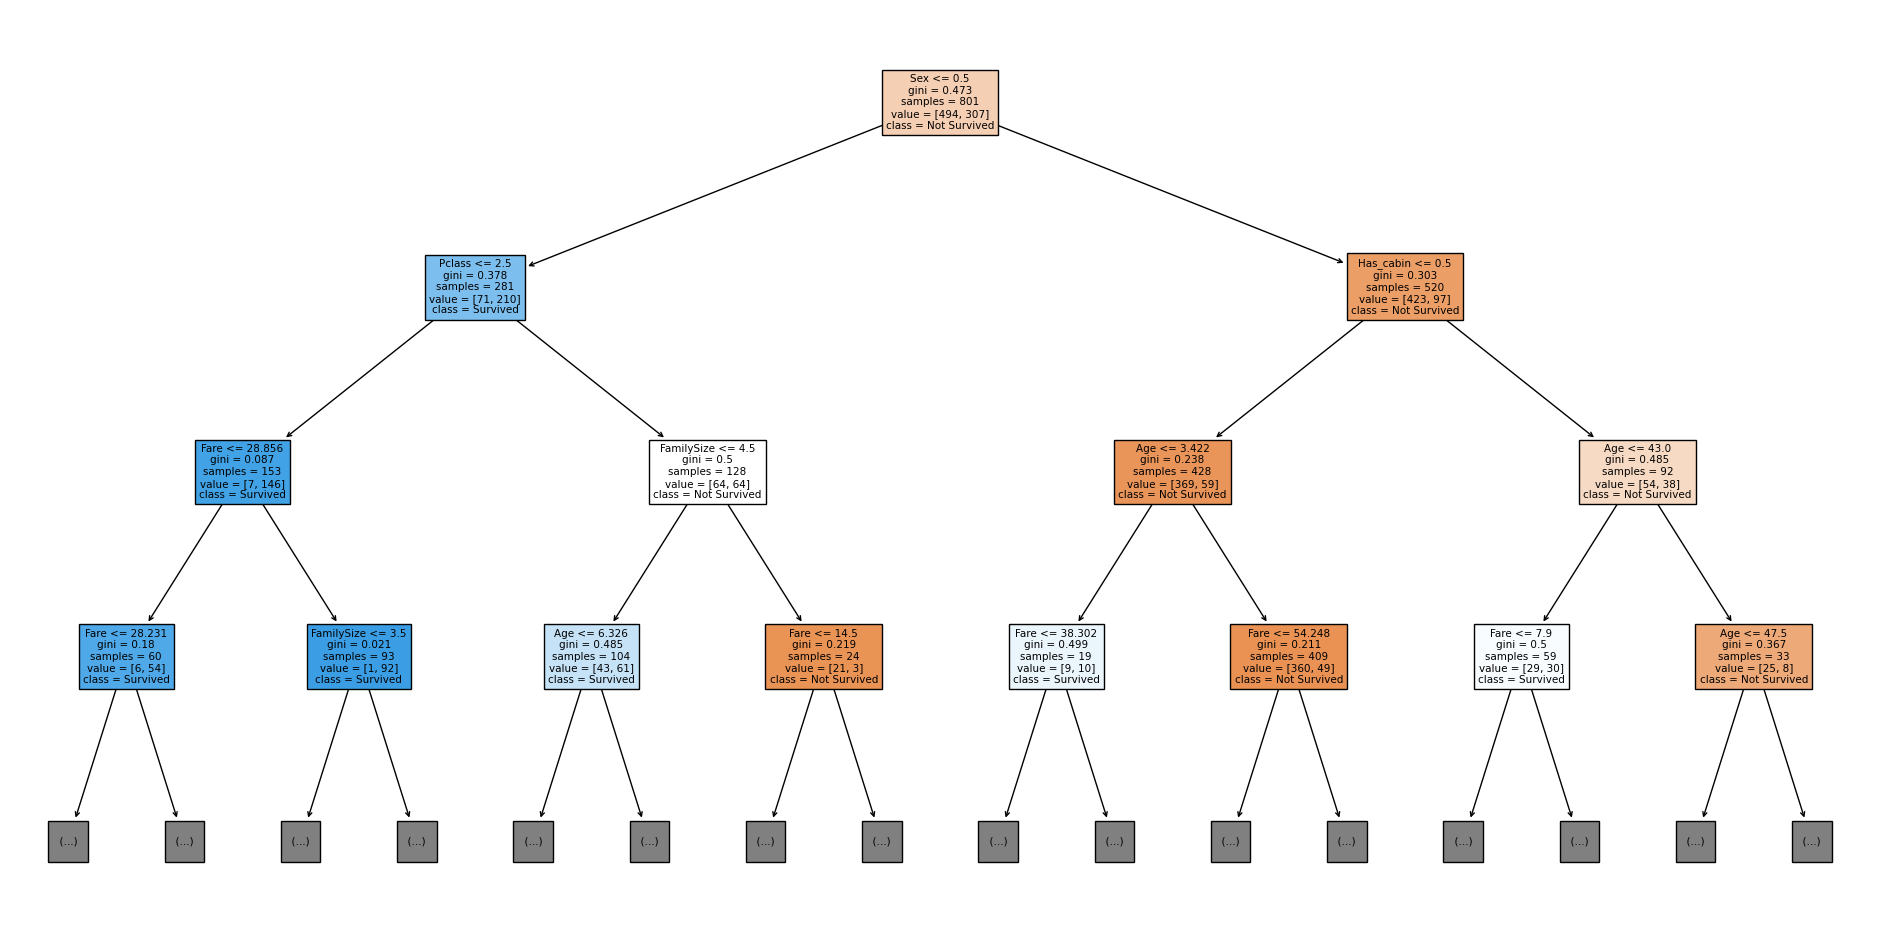

In [71]:

# plotting tree with max_depth=3
# Set figure size
plt.figure(figsize=(24, 12))

# Plot the decision tree with max depth of 3
plot_tree(model, filled=True, feature_names=x.columns, class_names=["Not Survived", "Survived"], max_depth=3)

# Show the plot
plt.show()


In [72]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions on the validation set
y_pred = model.predict(x_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_validation, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_validation, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_validation, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")



Confusion Matrix:
[[41 14]
 [ 7 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        55
           1       0.67      0.80      0.73        35

    accuracy                           0.77        90
   macro avg       0.76      0.77      0.76        90
weighted avg       0.78      0.77      0.77        90


Accuracy: 0.7667


In [73]:
# Printing confusion matrix and accuracy

from sklearn.metrics import confusion_matrix, accuracy_score

# Making predictions on validation set
y_pred = model.predict(x_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_validation, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_validation, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")



Confusion Matrix:
[[41 14]
 [ 7 28]]

Accuracy: 0.7667
